In [1]:
import pandas as pd
import os
file="/drive/MyDrive/hackathon/data/data/happy_images.zip"

In [2]:
os.chdir("/content/")

In [3]:
os.listdir()

['.config', 'drive', 'sample_data']

In [4]:
!unzip -u "/content/drive/MyDrive/Hackathon/data/data/happy_images.zip"  -d "/content/images"


Streaming output truncated to the last 5000 lines.
  inflating: /content/images/happy_images/03e43dd5-4d5b-41a8-b5bc-007c1ff940c6.jpg  
  inflating: /content/images/happy_images/884e8282-a4dd-4a43-970a-c8700d9f301e.jpg  
  inflating: /content/images/happy_images/04788cf5-6b2e-4e79-b306-f98d54bc5c4b.jpg  
  inflating: /content/images/happy_images/019f67b0-6a09-43d4-99f4-e3929ec1749b.jpg  
  inflating: /content/images/happy_images/38e961f3-9c59-4667-8cc8-ae913d8c099f.jpg  
  inflating: /content/images/happy_images/5bf510a5-2add-4f85-a222-e96b96419a3f.jpg  
  inflating: /content/images/happy_images/0502e3de-faa2-4abd-bcf8-46b2b33ac6fe.jpg  
  inflating: /content/images/happy_images/0e4ff859-79a3-4b51-b7a1-fe2e2f85c168.jpg  
  inflating: /content/images/happy_images/2cb2b9df-c6d6-463d-86bd-664a77ef73c3.jpg  
  inflating: /content/images/happy_images/091a8d16-15bd-4317-ac1a-a4f0d0556735.jpg  
  inflating: /content/images/happy_images/05499e59-7865-48c0-b5d3-09f8915f12f9.jpg  
  inflating: /

In [5]:
!cp "/content/drive/MyDrive/Hackathon/data/data/test.csv" "/content/test.csv"


In [6]:
!cp "/content/drive/MyDrive/Hackathon/data/data/train.csv" "/content/train.csv"


In [7]:
os.listdir()

['.config', 'drive', 'images', 'test.csv', 'train.csv', 'sample_data']

In [8]:
train=pd.read_csv('train.csv',index_col=None,header=None)
train.columns = ['path','label']
test=pd.read_csv('test.csv',index_col=None,header=None)
test.columns = ['path','label']

In [9]:
display(train.head(),test.head())

,path,label
0,05684c70-113d-4894-920e-140edf323528,negative smile
1,0403faa2-2d45-4779-b40a-794c220d3855,positive smile
2,1ba6784e-3684-4f76-81b7-504610a497e1,positive smile
3,675c87fb-bf50-481e-949d-07b5dc14b589,positive smile
4,02567fbb-1147-4186-8d7d-38611569fc06,NOT smile


,path,label
0,7a0e7396-47ca-421c-84bc-de7c946fc163,NOT smile
1,1e53ec28-b4c0-4eef-ad91-4940f535d354,NOT smile
2,05f0d520-8e85-4490-a160-5a346fc21fd3,positive smile
3,0adf2567-b325-47a8-a2c9-83b34c021163,NOT smile
4,0df7e500-a1d0-44dd-923d-25809fa38611,NOT smile


In [10]:
# train[train['label']=='NOT smile'] = 0
# train[(train['label']=='positive smile')] = 1
# train[train['label']=='negative smile'] = 1

In [11]:
# display(train)

In [12]:

# a = 1
# diction = {}
# train = train['label'].unique()
# for j in train:
#   diction[j]=a
#   a=a+1


In [13]:
# print(diction)
diction = {'negative smile': 1, 'positive smile': 1, 'NOT smile': 0}

In [14]:
l = train['label'].unique()
train['label'] = [diction[item] for item in train['label']]

In [15]:
m = test['label'].unique()
test['label'] = [diction[item] for item in test['label']]

In [16]:
display(train.head())

,path,label
0,05684c70-113d-4894-920e-140edf323528,1
1,0403faa2-2d45-4779-b40a-794c220d3855,1
2,1ba6784e-3684-4f76-81b7-504610a497e1,1
3,675c87fb-bf50-481e-949d-07b5dc14b589,1
4,02567fbb-1147-4186-8d7d-38611569fc06,0


In [17]:
display(test.head())

,path,label
0,7a0e7396-47ca-421c-84bc-de7c946fc163,0
1,1e53ec28-b4c0-4eef-ad91-4940f535d354,0
2,05f0d520-8e85-4490-a160-5a346fc21fd3,1
3,0adf2567-b325-47a8-a2c9-83b34c021163,0
4,0df7e500-a1d0-44dd-923d-25809fa38611,0


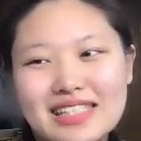

In [18]:
from PIL import Image 
from IPython.display import Image
Image('/content/images/happy_images/0000207d-95d9-49ff-9256-1d821fd31e36.jpg')

In [19]:
# l = train['path']
# for i in range(len(l)):
#   l[i] = '/content/images/happy_images/' + l[i]

In [20]:
display(train.head())

,path,label
0,05684c70-113d-4894-920e-140edf323528,1
1,0403faa2-2d45-4779-b40a-794c220d3855,1
2,1ba6784e-3684-4f76-81b7-504610a497e1,1
3,675c87fb-bf50-481e-949d-07b5dc14b589,1
4,02567fbb-1147-4186-8d7d-38611569fc06,0


In [21]:
# train.to_csv('train1.csv', index = False)

In [22]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as T

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [24]:
def show_landmarks(image):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.pause(0.001)  # pause a bit so that plots are updated



In [25]:
class FaceLandmarksDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = train['path']
        self.label = train['label']
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx]) +'.jpg'
        image = io.imread(img_name)

        # sample = image
        label = self.label.iloc[idx]
        sample = {'image': image, 'landmarks': label}
        if self.transform:
            sample = self.transform(sample)

        return sample

0 (241, 241, 3) 1


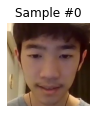

1 (195, 195, 3) 1


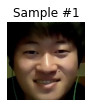

2 (182, 182, 3) 1


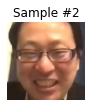

3 (206, 206, 3) 1


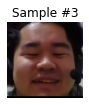

In [26]:
# transforms = torch.nn.Sequential(
#     transforms.CenterCrop(150),
#     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
# )
# transform = transforms.Compose([transforms.ToTensor(), 
#                                 transforms.CenterCrop(150),transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
face_dataset = FaceLandmarksDataset(train,
                                    root_dir='images/happy_images/')

fig = plt.figure()

for i in range(len(face_dataset)):
    sample = face_dataset[i]

    print(i, sample['image'].shape,sample['landmarks'])

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(sample['image'])

    if i == 3:
        plt.show()
        break

In [27]:
face_dataset_test = FaceLandmarksDataset(test,
                                    root_dir='images/happy_images/')

In [28]:
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or int): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        # h and w are swapped for landmarks because for images,
        # x and y axes are axis 1 and 0 respectively
        # landmarks = landmarks * [new_w / w, new_h / h]

        return {'image': img, 'landmarks': landmarks}


class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        image = image[top: top + new_h,
                      left: left + new_w]

        # landmarks = landmarks - [left, top]

        return {'image': image, 'landmarks': landmarks}


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        image = image.transpose((2, 0, 1))
        return {'image': torch.from_numpy(image),
                'landmarks': torch.as_tensor(np.array(landmarks).astype('float64'))}
                

In [29]:
from torchvision import transforms
transformed_dataset = FaceLandmarksDataset(train,
                                    root_dir='images/happy_images/',
                                           transform=transforms.Compose([
                                               Rescale(256),
                                               RandomCrop(224),
                                               ToTensor()
                                           ]))

In [30]:
transformed_dataset_test = FaceLandmarksDataset(test,
                                    root_dir='images/happy_images/',
                                           transform=transforms.Compose([
                                               Rescale(256),
                                               RandomCrop(224),
                                               ToTensor()
                                           ]))

In [31]:
for i in range(len(transformed_dataset)):
    sample = transformed_dataset[i]

    print(i, sample['image'].size(), sample['landmarks'].size())

    if i == 3:
        break

0 torch.Size([3, 224, 224]) torch.Size([])
1 torch.Size([3, 224, 224]) torch.Size([])
2 torch.Size([3, 224, 224]) torch.Size([])
3 torch.Size([3, 224, 224]) torch.Size([])


In [32]:
train_dataloader = DataLoader(transformed_dataset, batch_size=8, shuffle=True, num_workers=2)

In [33]:
test_dataloader = DataLoader(transformed_dataset_test, batch_size=8, shuffle=False, num_workers=2)

In [34]:
import os
import pandas as pd
import numpy as np
import albumentations
from PIL import Image
from collections import OrderedDict
import cv2
from sklearn.metrics import f1_score, accuracy_score

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader

In [35]:
device = 'cuda:0'

In [36]:
!pip install facenet-pytorch

     |████████████████████████████████| 1.9MB 7.8MB/s 


In [37]:
def model(pretrained, requires_grad):
  model = models.resnet18(progress=True, pretrained = pretrained)
  for param in model.parameters():
    param.requires_grad = requires_grad

  fc = nn.Sequential(OrderedDict([
  ('fc1', nn.Linear(512,128)),
  ('relu', nn.ReLU()),
  ('fc2', nn.Linear(128,1)),
  ('sig', nn.Sigmoid())
  ]))
  model.fc = fc
  return model

model = model(pretrained=True, requires_grad=False)
model.double()
model = model.to(device)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [50]:
print(model.parameters)

<bound method Module.parameters of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


In [38]:
optimizer = optim.Adam(model.parameters(), lr = 1e-3)
# criterion = nn.BCEWithLogitsLoss()
criterion = nn.BCELoss()

In [39]:
def accuracy(preds, labels):
  pred = preds
  
  labels = labels
  # print(pred,labels)
  return accuracy_score(labels, pred)


In [46]:
def train(model, train_dataloader):
  print('Training....')
  model.train()
  running_loss = 0.0
  train_running_accuracy = 0
  list1= []

  for i, sample in enumerate(train_dataloader):
    # print('---')
    data, target = sample['image'], sample['landmarks']
    data = data.to(device)
    target = target.unsqueeze(1).to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    running_loss += loss.item()
    loss.backward()
    optimizer.step()
    train_running_accuracy = accuracy(output.detach().cpu().numpy().round(), target.cpu().numpy())
    # print(test_running_accuracy)
    list1.append(train_running_accuracy)

  average_accuracy = (sum(list1))/len(list1)
  train_loss = running_loss/len(train_dataloader.dataset)
  print('Accuracy: {0:.4f}'.format(average_accuracy))
  print("Train Loss: {:0.4f}".format(train_loss))

  return train_loss,average_accuracy

def test(model, test_dataloader):
  print('Validating....')
  model.eval()
  list1= []
  test_running_accuracy = 0
  test_running_loss = 0
  # test_running_f1 = 0

  for sample in test_dataloader:
    data, target = sample['image'], sample['landmarks']
    data = data.to(device)
    target = target.unsqueeze(1).to(device)

    output = model(data)
    loss = criterion(output, target)
    output = output.detach().cpu().numpy()
    output = output.round()
    
    target = target.cpu().numpy()
    # test_running_f1 += f1(output, target)
    test_running_accuracy = accuracy(output, target)
    # print(test_running_accuracy)
    list1.append(test_running_accuracy)


    test_running_loss += loss.item()
  
  # average_f1 = test_running_f1 / len(test_dataloader)
  average_accuracy = (sum(list1))/len(list1)
  average_loss = test_running_loss/len(test_dataloader)

  print('Accuracy: {0:.4f}'.format(average_accuracy))
  # print('f1: {0:.2f}'.format(average_f1))
  print('loss: {0:.4f}'.format(average_loss))
  return average_loss,average_accuracy


In [48]:
epochs = 16
train_loss = [] 
train_accuracy = []
test_loss = []
test_accuracy = []
for epoch in range(1,epochs):
  print(f"epoch number : {epoch}")
  trnL,trnA =train(model, train_dataloader)
  train_loss.append(trnL)
  train_accuracy.append(trnA)
  print('-'*10)
  tstL,tstA=test(model, test_dataloader)
  test_loss.append(tstL)
  test_accuracy.append(tstA)

epoch number : 1
Training....
Accuracy: 0.7185
Train Loss: 0.0703
----------
Validating....
Accuracy: 0.7477
loss: 0.5149
epoch number : 2
Training....
Accuracy: 0.7409
Train Loss: 0.0657
----------
Validating....
Accuracy: 0.7661
loss: 0.5006
epoch number : 3
Training....
Accuracy: 0.7480
Train Loss: 0.0654
----------
Validating....
Accuracy: 0.7431
loss: 0.5255
epoch number : 4
Training....
Accuracy: 0.7550
Train Loss: 0.0642
----------
Validating....
Accuracy: 0.7485
loss: 0.5253
epoch number : 5
Training....
Accuracy: 0.7552
Train Loss: 0.0639
----------
Validating....
Accuracy: 0.7777
loss: 0.4704
epoch number : 6
Training....
Accuracy: 0.7626
Train Loss: 0.0627
----------
Validating....
Accuracy: 0.7699
loss: 0.4956
epoch number : 7
Training....
Accuracy: 0.7619
Train Loss: 0.0628
----------
Validating....
Accuracy: 0.7792
loss: 0.4763
epoch number : 8
Training....
Accuracy: 0.7601
Train Loss: 0.0636
----------
Validating....
Accuracy: 0.7825
loss: 0.4600
epoch number : 9
Trainin

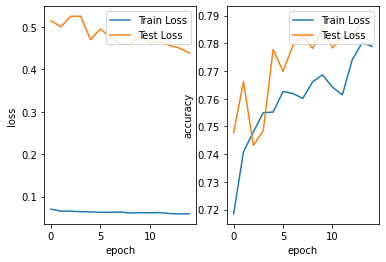

In [49]:
import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)
plt.plot(train_loss, label = 'Train Loss')
plt.plot(test_loss, label = 'Test Loss' )
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["Train Loss", "Test Loss"], loc ="upper right")

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label = 'Train Accuracy')
plt.plot(test_accuracy, label = 'Test Accuracy' )
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["Train Loss", "Test Loss"], loc ="upper right")
plt.show()